In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Utils functions

In [2]:
def expectedValue(xPx):
  return np.sum([xPx[i][0] * xPx[i][1] for i in range(len(xPx))])

In [3]:
def variance(xPx, expValue=True):
  E = expectedValue(xPx)
  if expValue:
    return {
      "variance": np.sum([xPx[i][1] * np.power(xPx[i][0] - E, 2) for i in range(len(xPx))]),
      "expectedValue": E
    }
  return np.sum([xPx[i][1] * np.power(xPx[i][0] - E, 2) for i in range(len(xPx))])

In [4]:
def plotGraphs(N, nBins, sample, teorical={}):
  meanExp = sample.get('meanExp')
  varExp = sample.get('varExp')
  if isinstance(teorical, dict) and teorical != {}:
    meanExp = teorical.get('expectedValue')
    varExp = teorical.get('variance')

  sampleValues = sample.get('values')
  fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(15,6))
  hist = ax[0].hist(sampleValues, nBins, density=True, edgecolor='black')
  topHist = np.max(hist[0]) + .1
  ax[0].vlines(meanExp-varExp, 0, topHist,  colors='m', linestyles='dotted', label='Variancia')
  ax[0].vlines(meanExp+varExp, 0, topHist,  colors='m', linestyles='dotted', label='_')
  ax[0].vlines(meanExp, 0, topHist, colors='r', linestyles='dashed', label='Média')
  ax[0].legend(frameon=True)
  ax[0].set_title('Distribuiçao de Probabilidade')
  ax[0].set_ylabel(r'Probabilidade de $w_i$')
  ax[0].set_xlabel(r'Valores Obtidos $w_i$')

  ax[1].plot(np.linspace(1,N,N), sample.get('valuesConvergence'))
  ax[1].hlines(meanExp, 0, N, colors='r', linestyles='dashed', label='Média')
  ax[1].hlines(meanExp+varExp, 0, N, colors='m', linestyles='dotted', label='Variancia')
  ax[1].hlines(meanExp-varExp, 0, N, colors='m', linestyles='dotted', label='_')
  ax[1].legend(frameon=True)
  ax[1].set_title('Convergencia Valor Esperado')
  ax[1].set_xlabel('N amostras')
  ax[1].set_ylabel(r'Valores Obtidos $w_i$')

  plt.show()

In [5]:
def binomialCoefficients(n,k):
  num = np.math.factorial(n)
  denom = np.math.factorial(k) * np.math.factorial(n-k)
  return num / denom

def hypergeometricDistribution(N,n,K,k):
  observedSuccess = binomialCoefficients(K,k)
  observedNonSuccess = binomialCoefficients(N-K, n-k)
  totalSample = binomialCoefficients(N,n)
  return (observedSuccess * observedNonSuccess) / totalSample

def poissonDistribution(l,k):
  return (np.math.pow(l,k) * np.exp(-l)) / np.math.factorial(k)

def binomialDistribution(n,p,k):
  observedSuccess = binomialCoefficients(n,k)
  kSuccess = np.math.pow(p,k)
  kNonSuccess = np.math.pow((1-p),(n-k))
  return observedSuccess * kSuccess * kNonSuccess 

### Exercicio 6

In [14]:
faultyPhones = [4,5,6]
N = 116
n = 18
K = 6
hyperGeomMapped = np.sum([hypergeometricDistribution(N,n,K,k) for k in faultyPhones])
print(hyperGeomMapped)

0.00519088005689372


### Exercicio 10

In [20]:
l = 7.5

k = 2
a = poissonDistribution(l, k)

kList = [0,1,2]
b = np.sum([poissonDistribution(l,k) for k in kList])

kList = [0,1,2,3,4,5,6,7]
c = 1 - np.sum([poissonDistribution(l,k) for k in kList])

print(a, b, c)

0.01555549791040782 0.020256715056664407 0.47536147351239455


In [27]:
l = 75

k = 20
a = poissonDistribution(l, k)

kList = np.arange(21)
b = np.sum([poissonDistribution(l,k) for k in kList])

kList = np.arange(80)
c = 1 - np.sum([poissonDistribution(l,k) for k in kList])

print(a, b, c)

3.4915197919220565e-14 4.731311946083773e-14 0.2967986003678572


### Exercicio 11

In [43]:
l = 8

kList = np.arange(0,10)
a = 1 - np.sum([poissonDistribution(l,k) for k in kList])

kList = np.arange(0,9)
b = np.sum([poissonDistribution(l,k) for k in kList])

kList = [7,8]
c = np.sum([poissonDistribution(l,k) for k in kList])

kList = np.arange(0,10)
d = (1 - np.sum([poissonDistribution(l,k) for k in kList])) * np.math.pow(0.6, len(kList)+1)

print(a, b, c, d)

0.28337574127298915 0.5925473414375914 0.27917306390119384 0.001028078846756581


### Exercicio 2

In [39]:
kList = [0,1,2,3]
N = 52
n = 3
K = 13
a = [hypergeometricDistribution(N,n,K,k) for k in kList]
xPx = [(kList[i], a[i]) for i in range(len(kList))]
var = variance(xPx)
print(a, var)

[0.41352941176470587, 0.43588235294117644, 0.1376470588235294, 0.012941176470588235] {'variance': 0.5404411764705882, 'expectedValue': 0.75}


In [40]:
kList = [0,1,2,3]
N = 52
n = 3
K = 26
a = [hypergeometricDistribution(N,n,K,k) for k in kList]
xPx = [(kList[i], a[i]) for i in range(len(kList))]
var = variance(xPx)
print(a, var)

[0.11764705882352941, 0.38235294117647056, 0.38235294117647056, 0.11764705882352941] {'variance': 0.7205882352941176, 'expectedValue': 1.5}


In [6]:
xPx = [
  ((-3)**2, 1/6),
  ((6)**2, 1/2),
  ((9)**2, 1/3)
]
expVal = expectedValue(xPx)
print(expVal)
print(4*46.5 + 4*5.5 + 1)

46.5
209.0


In [8]:
xPx = [
  (-6, 1/36),
  (3*2, 1/32),
  (6*2, 1/18),
  (12, 1/4),
  (15*2, 1/6),
  (18, 1/9)
]
print(variance(xPx))

{'variance': 77.0518798828125, 'expectedValue': 10.6875}


In [9]:
xPx = [
  ((-3)*2, 1/6),
  ((6)*2, 1/2),
  ((9)*2, 1/3)
]
print(variance(xPx))

{'variance': 65.0, 'expectedValue': 11.0}


In [12]:
xPx = [(i,1/10) for i in range(1,11)]
print(variance(xPx))

{'variance': 8.25, 'expectedValue': 5.5}


### Exercicio 5

In [17]:
np.sum([
  binomialCoefficients(5,x)*binomialCoefficients(7,4-x)
  for x in np.arange(0,3)
])

420.0

In [21]:
Px = [
  0.0024*binomialCoefficients(5,x)*binomialCoefficients(7,4-x)
  for x in np.arange(0,3)
]
print(Px)

[0.08399999999999999, 0.41999999999999993, 0.5039999999999999]


In [22]:
xPx = [
  (0, Px[0]**2),
  (1, Px[0]*Px[1]*2),
  (2, Px[0]*Px[2]*2 + Px[1]**2),
  (3, Px[1]*Px[2]),
  (4, Px[2]**2)
]
print(xPx)
print(variance(xPx))

[(0, 0.007055999999999999), (1, 0.07055999999999998), (2, 0.2610719999999999), (3, 0.21167999999999992), (4, 0.2540159999999999)]
{'variance': 1.0646868032735481, 'expectedValue': 2.243807999999999}


## Extras

### Extra 1

In [18]:
N = 200
n = 5
K = 10
k = 1
oneDefectA = hypergeometricDistribution(N,n,K,k)
oneDefectB = hypergeometricDistribution(N-n,n,K-k,k)
print(oneDefectA, oneDefectB, oneDefectA * oneDefectB)

0.2074504137802865 0.19473223700771033 0.04039728314361033


### Extra 2

In [27]:
p = 5/8

p0 = binomialCoefficients(4,4) * (p**4) + binomialCoefficients(4,4) * ((1-p)**4)
p3 = binomialCoefficients(4,1) * p * ((1-p)**3) + binomialCoefficients(4,1) * (p**3) * (1-p) 
p4 = binomialCoefficients(4,2) * (p**2) * ((1-p)**2)

xPx = [
  (0, p0),
  (3, p3),
  (4, p4)
]
print(variance(xPx))
print(p0, p3, p4)
count = 0
cumDist = []
for k in [p0, p3, p4]:
  count+=k
  cumDist.append(count)
print(cumDist)

{'variance': 1.845703125, 'expectedValue': 2.8125}
0.17236328125 0.498046875 0.32958984375
[0.17236328125, 0.67041015625, 1.0]


### Extra 3

In [23]:
l = 2.5 * 5
k = 12
b = poissonDistribution(l,k)
print(b)

cumDist = []
count=0
for k in np.arange(20):
  count+=poissonDistribution(l,k)
  cumDist.append(count)
# print(cumDist)
indexesMedian = [cumDist[k] for k in range(len(cumDist)) if cumDist[k] <= 0.6]
print(indexesMedian)
print(len(indexesMedian)-1)

0.11321453006756814
[3.726653172078671e-06, 5.0309817823062054e-05, 0.0003414545968917082, 0.0015545578430110675, 0.005345505487134064, 0.014822874597441558, 0.034567393577248834, 0.06982546318404753, 0.12491619694467052, 0.20143110494553576, 0.2970747399466173, 0.40576068881148275, 0.5189752188790508]
12


### Extra 4

In [28]:
lX = 0.4 * 3.5
lY = 0.4 * 2.8
print(lX, lY)

bX = poissonDistribution(l=lX, k=0)
bY = poissonDistribution(l=lY, k=0)
print(bX, bY, bX*bY)

c = poissonDistribution(l=lX, k=2) * poissonDistribution(l=lY, k=1)
print(c)

xList = np.arange(20)
d = []
for xi in xList:
  pX = poissonDistribution(lX,xi)
  pY = np.sum([poissonDistribution(lY,k) for k in np.arange(0,xi)])
  d.append(pX * pY)
print(np.sum(d))

1.4000000000000001 1.1199999999999999
0.24659696394160643 0.3262797946230395 0.08045960674953243
0.08831246436828681
0.4334770286856958


# Feitos com calma:

## Exercício 1

In [150]:
def sampleEx1(N, pC):
  values = []
  valuesConvergence = []
  valueConvergence = 0
  for i in range(1,N+1):
    value = 0
    for j in range(3):
      r = np.random.random()
      if r < pC: value += 1
      else: value -= 1
    values.append(value)
    valueConvergence += value
    valuesConvergence.append(valueConvergence / i)
    # print(value, valueConvergence)
  print("Media: {}".format(np.mean(values)))
  print('Variancia: {}'.format(np.var(values)))
  return {
    "values": values,
    "meanExp": np.mean(values),
    "varExp": np.var(values),
    "valuesConvergence": valuesConvergence
  }

### (c)

Media: -0.0172
Variancia: 2.96290416
Media Teorica: 0.0
Variancia Teorica: 3.0


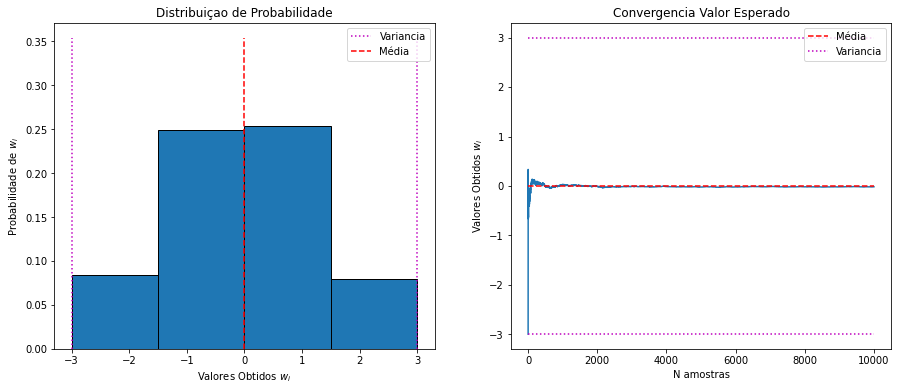

In [152]:
N = 10000
pC = 1/2
nBins = 4
sample = sampleEx1(N, pC)
xPx = [
  (3, np.power(pC, 3)), 
  (1, 3*np.power(pC, 3)),
  (-1, 3*np.power(pC, 3)),
  (-3, np.power(pC, 3))
]
V = variance(xPx)
print('Media Teorica: {}'.format(V.get('expectedValue')))
print('Variancia Teorica: {}'.format(V.get('variance')))
plotGraphs(N, nBins, sample, teorical=V)

### (d)

Media: 1.0478
Variancia: 2.6453151600000004
Media Teorica: 0.9999999999999996
Variancia Teorica: 2.6666666666666665


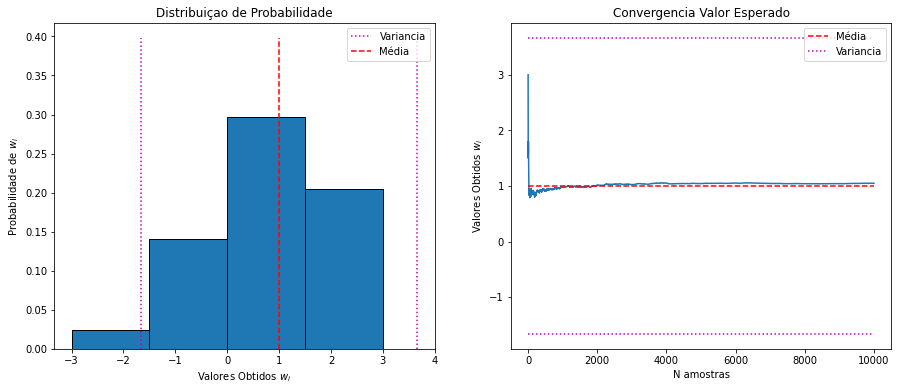

In [153]:
N = 10000
pC = 2/3
nBins = 4
sample = sampleEx1(N, pC)

xPx = [
  (3, np.power(pC, 3)), 
  (1, 3*pC*pC*(1-pC)),
  (-1, 3*pC*(1-pC)*(1-pC)),
  (-3, np.power((1-pC), 3))
]

V = variance(xPx)
print('Media Teorica: {}'.format(V.get('expectedValue')))
print('Variancia Teorica: {}'.format(V.get('variance')))
plotGraphs(N, nBins, sample, teorical=V)

## Exercício 2

### (a)

In [154]:
def sampleEx2_a(N):
  values = []
  valuesConvergence = []
  valueConvergence = 0
  for i in range(1,N+1):
    cardSuit = [
      'S','S','S','S','S','S','S','S','S','S','S','S', 
      'D','D','D','D','D','D','D','D','D','D','D','D',
      'C','C','C','C','C','C','C','C','C','C','C','C',
      'H','H','H','H','H','H','H','H','H','H','H','H'
    ]
    value = 0
    for j in range(3):
      r = np.random.randint(0, len(cardSuit))
      chosenSuit = cardSuit.pop(r)
      if chosenSuit == 'S': value += 1
    values.append(value)
    valueConvergence += value
    valuesConvergence.append(valueConvergence / i)
    # print(value, valueConvergence)
  print("Media: {}".format(np.mean(values)))
  print('Variancia: {}'.format(np.var(values)))
  return {
    "values": values,
    "meanExp": np.mean(values),
    "varExp": np.var(values),
    "valuesConvergence": valuesConvergence
  }

Media teorica: 0.75
Variancia teorica: 0.5404411764705882
Media: 0.751
Variancia: 0.522599


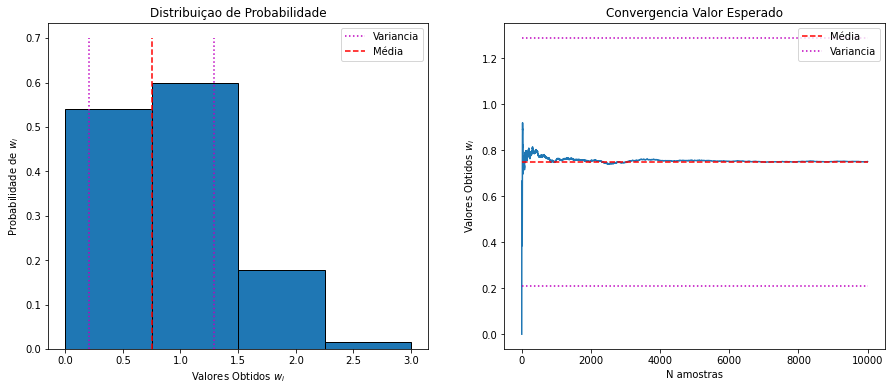

In [159]:
N = 10000
nBins = 4
xPx = [
  (3, (13*12*11)/(52*51*50)),
  (2, 3*(13*12*39)/(52*51*50)),
  (1, 3*(13*39*38)/(52*51*50)),
  (0, (39*38*37)/(52*51*50))
]
E = expectedValue(xPx)
print(f'Media teorica: {E}')
V = variance(xPx)
print('Variancia teorica: {}'.format(V.get('variance')))

sample = sampleEx2_a(N)
plotGraphs(N, nBins, sample, teorical=V)

### (c)

In [160]:
def sampleEx2_c(N):
  values = []
  valuesConvergence = []
  valueConvergence = 0
  for i in range(1,N+1):
    cardSuit = [
      'S','S','S','S','S','S','S','S','S','S','S','S', 
      'D','D','D','D','D','D','D','D','D','D','D','D',
      'C','C','C','C','C','C','C','C','C','C','C','C',
      'H','H','H','H','H','H','H','H','H','H','H','H'
    ]
    value = 0
    for j in range(3):
      r = np.random.randint(0, len(cardSuit))
      chosenSuit = cardSuit.pop(r)
      if chosenSuit == 'S' or chosenSuit == 'D': value += 1
    values.append(value)
    valueConvergence += value
    valuesConvergence.append(valueConvergence / i)
    # print(value, valueConvergence)
  print("Media: {}".format(np.mean(values)))
  print('Variancia: {}'.format(np.var(values)))
  return {
    "values": values,
    "meanExp": np.mean(values),
    "varExp": np.var(values),
    "valuesConvergence": valuesConvergence
  }

Media teorica: 3.411764705882353
Variancia teorica: 11.809485039690614
Media: 1.5056
Variancia: 0.71336864


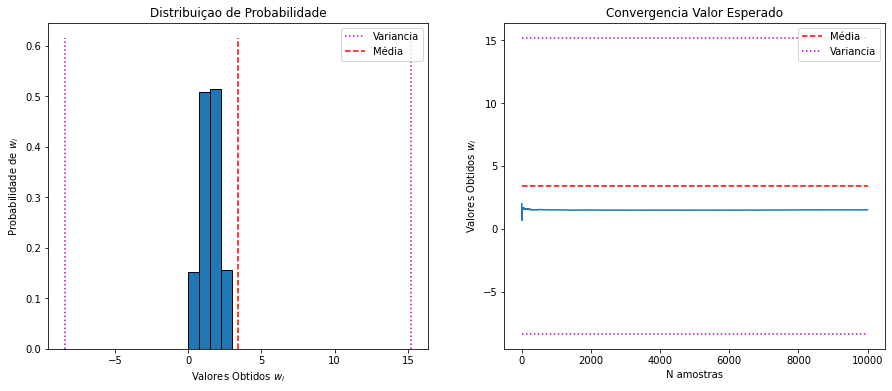

In [161]:
N = 10000
nBins = 4
xPx = [
  (3, (26*25*24)/(52*51*50)),
  (2, 3*2*(26*26*25)/(52*51*50)),
  (1, 3*4*(26*26*25)/(52*51*50)),
  (0, (26*25*24)/(52*51*50))
]
E = expectedValue(xPx)
print(f'Media teorica: {E}')
V = variance(xPx)
print('Variancia teorica: {}'.format(V.get('variance')))

sample = sampleEx2_c(N)
plotGraphs(N, nBins, sample, teorical=V)

## Exercício 3

### (a)

In [13]:
def sampleEx3_a(N):
  values = []
  valuesConvergence = []
  valueConvergence = 0
  for i in range(1,N+1):
    value = 0
    r = np.random.random()
    if r < 1/6: value = -3
    if r >= 1/6 and r < 4/6: value = 6
    if r >= 4/6: value = 9
    values.append(value)
    valueConvergence += value
    valuesConvergence.append(valueConvergence / i)
    # print(value, valueConvergence)
  print("Media: {}".format(np.mean(values)))
  print('Variancia: {}'.format(np.var(values)))
  return {
    "values": values,
    "meanExp": np.mean(values),
    "varExp": np.var(values),
    "valuesConvergence": valuesConvergence
  }

Media teorica: 5.5
Variancia teorica: 16.25
Media: 5.4834
Variancia: 16.240924439999997


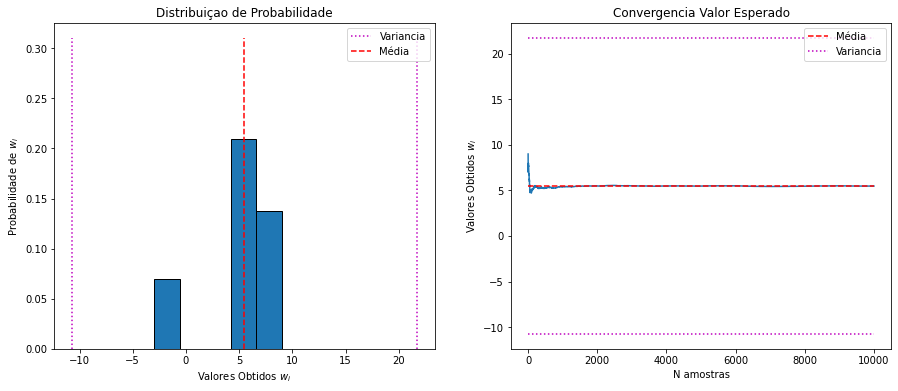

In [14]:
N = 10000
nBins = 5
xPx = [
  (-3, 1/6),
  (6, 1/2),
  (9, 1/3)
]
E = expectedValue(xPx)
print(f'Media teorica: {E}')
V = variance(xPx)
print('Variancia teorica: {}'.format(V.get('variance')))

sample = sampleEx3_a(N)

plotGraphs(N, nBins, sample, teorical=V)

### (b)

In [17]:
def sampleEx3_b(N):
  values = []
  valuesConvergence = []
  valueConvergence = 0
  for i in range(1,N+1):
    value = 0
    for j in range(2):
      r = np.random.random()
      if r < 1/6: value += -3
      if r >= 1/6 and r < 4/6: value += 6
      if r >= 4/6: value += 9
    values.append(value)
    valueConvergence += value
    valuesConvergence.append(valueConvergence / i)
    # print(value, valueConvergence)
  print("Media: {}".format(np.mean(values)))
  print('Variancia: {}'.format(np.var(values)))
  return {
    "values": values,
    "meanExp": np.mean(values),
    "varExp": np.var(values),
    "valuesConvergence": valuesConvergence
  }

Media teorica: 11.0
Variancia teorica: 32.5
Media: 11.0841
Variancia: 32.31802719


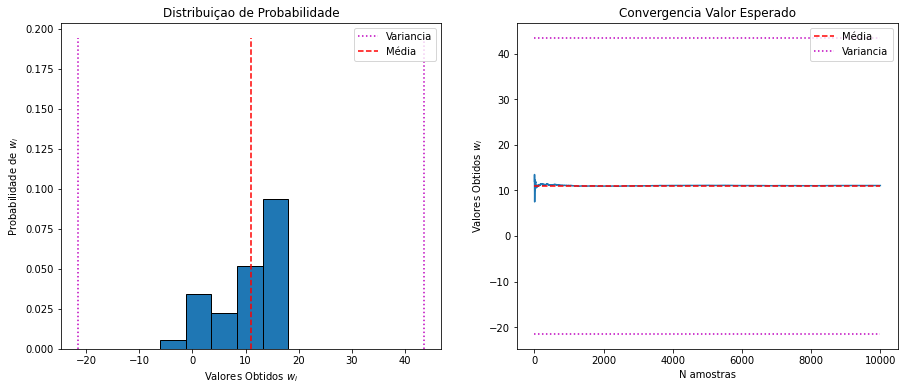

In [19]:
N = 10000
nBins = 5
xPx = [
  (-6, (1/6)*(1/6)),
  (3, 2*(1/6)*(1/2)),
  (6, 2*(1/3)*(1/6)),
  (12, (1/2)*(1/2)),
  (15, 2*(1/2)*(1/3)),
  (18, (1/3)*(1/3))
]
E = expectedValue(xPx)
print(f'Media teorica: {E}')
V = variance(xPx)
print('Variancia teorica: {}'.format(V.get('variance')))

sample = sampleEx3_b(N)

plotGraphs(N, nBins, sample, teorical=V)

### (c)

In [6]:
def sampleEx3_c(N):
  values = []
  valuesConvergence = []
  valueConvergence = 0
  for i in range(1,N+1):
    value = 0
    r = np.random.random()
    if r < 1/6: value = -6
    if r >= 1/6 and r < 4/6: value = 12
    if r >= 4/6: value = 18
    values.append(value)
    valueConvergence += value
    valuesConvergence.append(valueConvergence / i)
    # print(value, valueConvergence)
  print("Media: {}".format(np.mean(values)))
  print('Variancia: {}'.format(np.var(values)))
  return {
    "values": values,
    "meanExp": np.mean(values),
    "varExp": np.var(values),
    "valuesConvergence": valuesConvergence
  }

Media teorica: 11.0
Variancia teorica: 65.0
Media: 11.046
Variancia: 65.553084


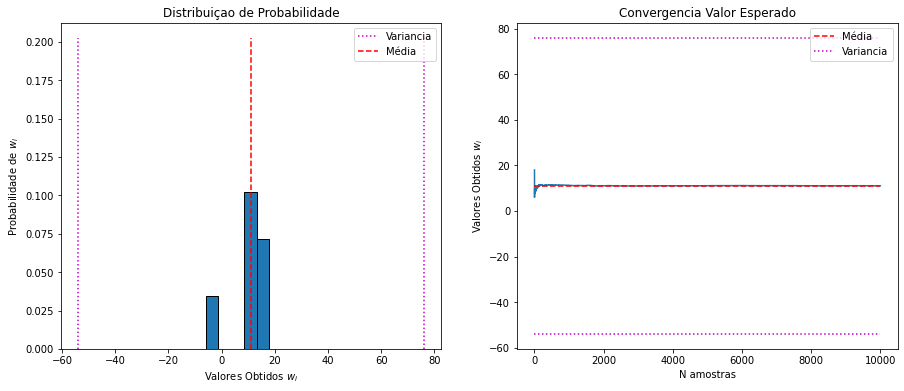

In [7]:
N = 10000
nBins = 5
xPx = [
  (-6, 1/6),
  (12, 1/2),
  (18, 1/3)
]
E = expectedValue(xPx)
print(f'Media teorica: {E}')
V = variance(xPx)
print('Variancia teorica: {}'.format(V.get('variance')))

sample = sampleEx3_c(N)

plotGraphs(N, nBins, sample, teorical=V)

## Exercício 4